In [1]:
%pylab inline
!pip install JSAnimation
import math

Populating the interactive namespace from numpy and matplotlib
Defaulting to user installation because normal site-packages is not writeable


In [14]:
def sense(x):
    return x

def simulate(Δt, x, u):
    x += Δt * u
    return x

def control(t, y, kp, ki, zd, z0):
    ut = kp * (math.exp(-kp * t)) * (zd - z0) + ki * t * (zd - y[1])
    uz = y[3]
    az = min(10, max(-10,(ut - uz) / 0.05))
    return array([0., uz, 0, az])

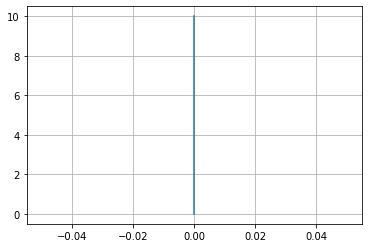

In [15]:
tf = 5.
Δt = 0.05
time = linspace(0., tf, int(tf / Δt) + 1)

robot = array([0., 0., 0., 0.])
robot_log = [copy(robot)]
zd = 10.
z0 = 0.
kp = 3.
ki = 1.

for t in time:
    robot_sense = sense(robot)
    velocity = control(t, robot_sense, kp, ki, zd, z0)
    robot = simulate(Δt, robot, velocity)
    robot_log.append(copy(robot))

robot_log = array(robot_log)

grid()
plot(robot_log[:,0], robot_log[:,1])

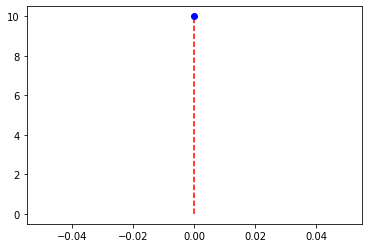

In [16]:
import matplotlib.pyplot as plt
from matplotlib import animation
from JSAnimation import IPython_display    
from IPython.display import HTML
    


fig, ax = plt.subplots()

def animate(t):
    ax.clear()
    
    # Path
    plot(robot_log[:,0], robot_log[:,1], 'r--')
    
    # Initial conditions
    plot(robot_log[t,0], robot_log[t,1], 'bo')
    
    

anim = animation.FuncAnimation(fig, animate, frames=len(time), interval=50)

HTML(anim.to_jshtml())